In [1]:
import pandas as pd
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

__Load True Values__

In [39]:
check_char = pd.read_csv('12-2-2018-char_hold_out.csv')
check_char.columns
del check_char['Unnamed: 0']
del check_char['new_fn']
check_char['old_fn'] = check_char['old_fn'].apply(lambda st: st[0:4])

In [40]:
check_script = pd.read_csv('12-2-2018-script_hold_out.csv')
check_script.columns
del check_script['Unnamed: 0']
del check_script['new_fn']
check_script['old_fn'] = check_script['old_fn'].apply(lambda st: st[10:-8])

__Sklearn Confusion Matrix__

https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

In [60]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True')
    plt.xlabel('Predicted')
    plt.tight_layout()

__Load Predictions__

In [74]:
read_script = pd.read_csv('example_script_predict.csv')
read_char = pd.read_csv('example_char_predict.csv')

In [75]:
script_true = check_script['old_fn'].values
script_pred = read_script.iloc[:,-1].values

char_true = check_char['old_fn'].values
char_pred = read_char.iloc[:,-1].values

__Check Script Predictions__

Confusion matrix, without normalization
[[ 61   0   0   0]
 [  0 115   0   0]
 [  0   0  23   0]
 [  0   0   0  35]]
Normalized confusion matrix
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


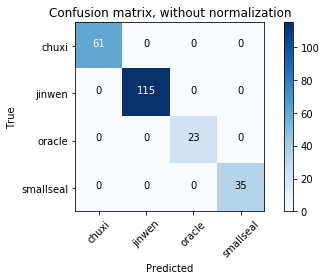

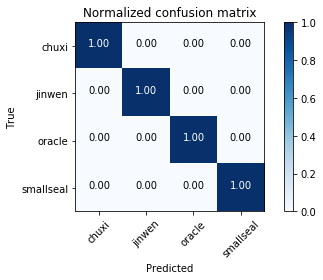

In [66]:
script_true = check_script['old_fn'].values
# script_pred = read_script.iloc[:,-1].values
# script_pred = check_script.sample(frac=1).iloc[:,-1].values
script_pred = check_script['old_fn'].values

# Compute confusion matrix
cnf_matrix = confusion_matrix(script_true, script_pred)
np.set_printoptions(precision=2)

class_names = check_script['old_fn'].unique()

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Confusion matrix, without normalization
[[18 31  3  9]
 [30 53 12 20]
 [ 6 11  5  1]
 [ 7 20  3  5]]
Normalized confusion matrix
[[0.3  0.51 0.05 0.15]
 [0.26 0.46 0.1  0.17]
 [0.26 0.48 0.22 0.04]
 [0.2  0.57 0.09 0.14]]


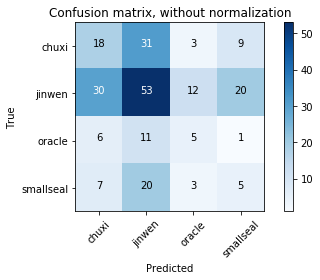

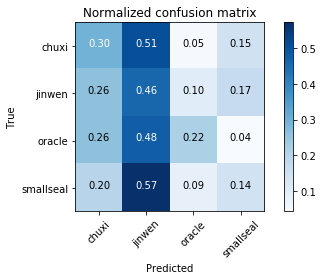

In [67]:
script_true = check_script['old_fn'].values
script_pred = check_script.sample(frac=1).iloc[:,-1].values

# Compute confusion matrix
cnf_matrix = confusion_matrix(script_true, script_pred)
np.set_printoptions(precision=2)

class_names = check_script['old_fn'].unique()

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

__Check Char Predictions__

_Yes, I was too lazy to write my own code here_

In [78]:
from sklearn.metrics import accuracy_score
y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]
print(accuracy_score(char_true, char_pred))
print(accuracy_score(char_true, char_pred, normalize=False))

0.02
1
